In [1]:
import numpy as np  
import pandas as pd  # для работы с таблицами
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 
import scipy.stats as stats
import seaborn as sns # Более продвинутая библиотека для визуализации

In [2]:
def mean_confidence_interval(data, confidence=0.95):   
    n = len(data)
    m, se = np.mean(data), scipy.stats.sem(data)
    h = se * scipy.stats.t.ppf((1 + confidence)/2, n)  #  функция ppf из scipy возвращает нам перцентиль
    return m-h, m, m+h  #,h

# Задания для самостоятельного решения


<div class="alert alert-info">
<b>Задание № 0</b>

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
    
Ответ округлите до целого
</div>

$$ n = (\frac{Z*\sigma}{\Delta})^2$$

- $\Delta$ - допустимая ошибка/погрешность, 

- $\sigma$ - стандартное отклонение, 

- Z - квантиль нормального распределения

In [3]:
def get_answer_for_task_00() -> int:
    Delta = 3
    sigma = 225**0.5
    Z = 0.95 
    return int(((sigma * Z) / Delta) ** 2)

n = get_answer_for_task_00()
n

22

<div class="alert alert-info">
<b>Задание № 1</b>

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 15$.
    
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого
</div>

In [4]:
def get_answer_for_task_01() -> int:
    data = stats.norm.rvs(loc=130, scale=15, size=25)
    confidence_interval = mean_confidence_interval(data=data)
    return int(confidence_interval[2] - confidence_interval[1])

L = get_answer_for_task_01()
L

7

### 2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин. 
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
</div>

0.011482047590460889


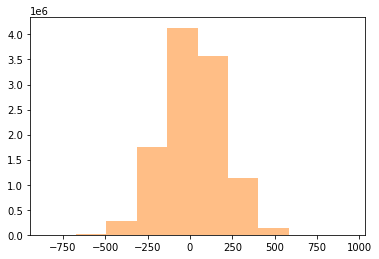

In [5]:
# В МАССИВЫ ПОПАДАЮТ ОТРИЦАТЕЛЬНЫЕ ЗНАЧЕНИЯ !!! p-value от запуска к запуска врьирует от 0.001 до 0.9 

population_men = stats.norm.rvs(loc=19, scale=171, size=11_000_000)  # Выборка мужчин со средним ростом 171
population_women = stats.norm.rvs(loc=16, scale=165, size=12_000)  # Выборка женщин со средним ростом 165

statistic, pvalue  = stats.ttest_ind(population_men, population_women)

print(pvalue)

plt.hist(population_women, alpha=0.5)
plt.hist(population_men, alpha=0.5) 
plt.show()

### 3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей. 

<div class="alert alert-info">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

In [6]:
def get_answer_for_task_03() -> int:
    Delta = 50
    sigma = 150
    Z = 0.95 
    return int(((sigma * Z) / Delta) ** 2)

n = get_answer_for_task_03()
n

8

<div class="alert alert-info">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [7]:
observations = pd.DataFrame([[10,15],[39,34]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,10,15
Солнце,39,34


In [8]:
import scipy.stats as stats
# Учтите, что у тестов, в том чилсле и точного теста Фишера под нелевой гипотезой подразумевается случайность/отсутсвие эффекта


oddsratio, pvalue = stats.fisher_exact(observations)


if pvalue > 0.05:
    print('маг умеет предсказывать погоду')
else:
    print('маг не умеет предсказывать погоду')

маг умеет предсказывать погоду


<div class="alert alert-info">
<b>Задание № 5</b> 

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [9]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

confidence_interval = mean_confidence_interval(data, confidence=0.9)

confidence_interval[0], confidence_interval[2]

(6.074074746111319, 7.183068111031539)

<div class="alert alert-info">
<b>Задание № 6</b>

Принадлежат ли выборки data_1 и data_2 одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

2.1159475572725764e-11 не принадлежат


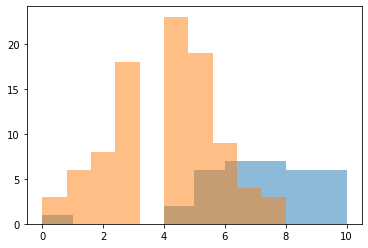

In [10]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,
          6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,
          5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,
          2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,
          3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,
          3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]

statistic, pvalue  = stats.ttest_ind(data_1, data_2)

print(pvalue, 'принадлежат')

plt.hist(data_1, alpha=0.5)
plt.hist(data_2, alpha=0.5) 
plt.show()

<div class="alert alert-info">
<b>Задание № 7 (задание без подвоха)</b>

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

In [11]:
'''
Будем считать что у нас распределение ненормальное так как  0.03 < 0.05
'''

'\nБудем считать что у нас нормальное распределение\n'

<div class="alert alert-info">
<b>Задание № 8</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

0.051284593140469285


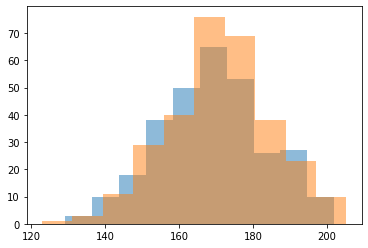

"\nВопрос: При каком минимальном p-value различия были бы уже значимы?\nОтвет: Знаачимых различий эффективности препаратов А и B нет так как p-value = 0.05\n\nВопрос: При каком минимальном p-value различия были бы уже значимы?\nОтвет: выше  p-value = 0.05'\n"

In [12]:
np.random.seed(11)
A = stats.norm.rvs(scale=15,loc=169,size=300)
B = stats.norm.rvs(scale=14,loc=171.4,size=300)

### Ваш код:
# Подсказка, обратите внимание на Two-sample T-test

statistic, pvalue = stats.ttest_ind(A, B)

print(pvalue)

plt.hist(A, alpha=0.5)
plt.hist(B, alpha=0.5) 
plt.show()

'''
Вопрос: При каком минимальном p-value различия были бы уже значимы?
Ответ: Значимых различий эффективности препаратов А и B нет так как p-value = 0.05

Вопрос: При каком минимальном p-value различия были бы уже значимы?
Ответ: ниже p-value = 0.05'
'''

In [110]:
import re

def myAtoi(s: str) -> int:

    if re.search(r'^[A-Za-z.]', s) != None:
        return 0

    num = int(''.join(re.findall(r'-{0,}\d{1,}\.{0,}', s)).replace('.', ''))
    int_max = (2**31) - 1
    int_min = -(2**31)

    if num > int_max:
        return int_max
    elif num < int_min :
        return int_min
    else:
        return num

print(myAtoi("-+12"))

0
